# Ejercicio 2

Este ejercicio pretende poner en práctica la habilidad de limpiar datos y visualizar plots para crear finalmente modelos en __sklearn__.

El estudiante tendrá que repasar los comandos realizados en clase y lidiar con posibles errores durante el desarrollo. 

Para facilitar y agilizar el desarrollo, el estudiante tendrá que rellenar los huecos marcados como __# codigo-alumno__. No obstante, si además el estudiante necesita ejecutar código adicional, siempre podrá utilizar cualquier celda intermedia. 

Las celdas con el título __""" No alterar """__, no deben ser modificadas por el estudiante. Sin embargo sí que se pueden ejecutar, pues representan controles intermedios para asegurar que no se cometen errores importantes que desvirtuen el desarrollo esperado del ejercicio.

Finalmente, la entrega será un fichero .ipynb cambiando nombre y apellido al fichero. No hace falta entregarlo en html/pdf ni comprimirlo.

# Fase inicial: Preparativos del ejercicio

Estableceremos una semilla que nos permita generar números aleatorios bajo control.

__Importante__: Todos los comandos (incluido algoritmos) generen números aleatorios deberás ser inicializados con esta semilla.

In [1]:
seed = 99

Además, cargaremos todos los comandos vistos en el curso. Si el estudiante considera utilizar alguna librería adicional, puede hacerlo en esta fase.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('darkgrid')
np.set_printoptions(precision=3)
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

Trabajaremos con el dataframe de sklearn llamado _fetch_kddcup99_ y lo almacenacenaremos en una variable. Además, no trabajaremos con todas las variables, sino con las features seleccionadas en _key_colums_ y la variable a predecir _target_.

_Nota_: Si tuvieramos problemas en esta celda, lo más probable es que se deba a que tengamos una versión inferior a 0.24 de sklearn

In [3]:
from sklearn.datasets import fetch_kddcup99

data = fetch_kddcup99(as_frame=True)
df = data.frame

key_columns = ['duration', 'protocol_type', 'service', 'flag', 'logged_in', 'count', 'srv_count', 'serror_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate']
target = 'labels'

df = df[key_columns + [target]]

# iym: decode las variables tipo byte a string
for feature in ['protocol_type', 'service','flag', 'labels']:
    df[feature] = [i.decode('UTF-8') for i in df[feature]]
    
df = df.convert_dtypes()
df.head()

,duration,protocol_type,service,flag,logged_in,count,srv_count,serror_rate,dst_host_srv_count,dst_host_srv_serror_rate,labels
0,0,tcp,http,SF,1,8,8,0.0,9,0.0,normal.
1,0,tcp,http,SF,1,8,8,0.0,19,0.0,normal.
2,0,tcp,http,SF,1,8,8,0.0,29,0.0,normal.
3,0,tcp,http,SF,1,6,6,0.0,39,0.0,normal.
4,0,tcp,http,SF,1,6,6,0.0,49,0.0,normal.


# Fase exploración, limpieza y transformación

En la siguiente celda, comprobad que no haya nulos

In [4]:
# codigo-alumno

df.isnull().sum()

duration                    0
protocol_type               0
service                     0
flag                        0
logged_in                   0
count                       0
srv_count                   0
serror_rate                 0
dst_host_srv_count          0
dst_host_srv_serror_rate    0
labels                      0
dtype: int64

En la siguiente celda, eliminad los registros duplicados

In [5]:
# codigo iym
df.duplicated().sum()

439856

In [6]:
# codigo-alumno
df = df.drop_duplicates()


In [7]:
# comprobacion iym
print(df.duplicated().sum())

0


In [8]:
""" No alterar """

try:
    assert df.shape == (54165, 11)
except:
    print('Algo falla')

En la siguiente celda, mostrad un barplot para la variable objetivo (labels)

_Nota_: Un barplot para variables categóricas, no histograma

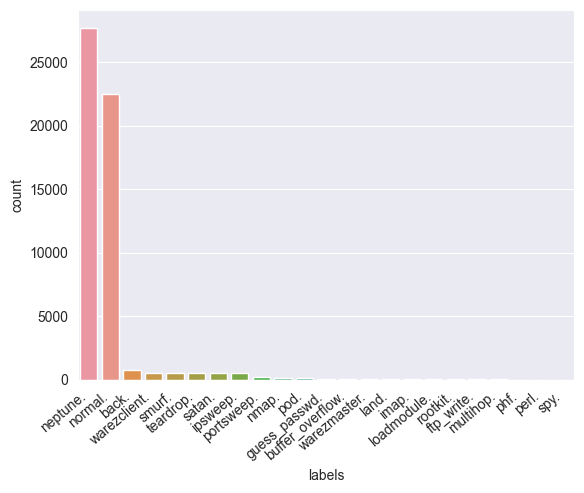

In [9]:
# codigo-alumno
a = sns.countplot(data = df, 
                  x = target,
                 order = df['labels'].value_counts().index)
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
plt.show()


A continuación, solo trabajaremos con las labels de mayor frecuencia. Por tanto, en la siguiente celda, filtrad el dataframe para quedarnos con las más frecuentes.

In [10]:
# codigo ivonne, frecuencia para las categoricas
counts = df['labels'].value_counts()
counts


neptune.            27722
normal.             22455
back.                 753
warezclient.          536
smurf.                523
teardrop.             503
satan.                502
ipsweep.              501
portsweep.            242
nmap.                 132
pod.                  123
guess_passwd.          53
buffer_overflow.       29
warezmaster.           20
land.                  17
imap.                  12
loadmodule.             9
rootkit.                9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: labels, dtype: Int64

In [11]:
# codigo-alumno
# df.labels = [i.decode('UTF-8') for i in df.labels]
df = df[df.labels.isin(['normal.', 'neptune.'])].copy()

# iym: Para la columna labels filtra solo cuando la frecuencia sea mayor a 753
# df = df[df['labels'].map(df['labels'].value_counts()) > 753]

df.shape

(50177, 11)

In [12]:
""" No alterar """

try:
    assert df.shape == (50177, 11)
except:
    print('Algo falla')

En la siguiente celda, volved a mostra un barplot para la variable objetivo (labels) del dataframe ya filtrado

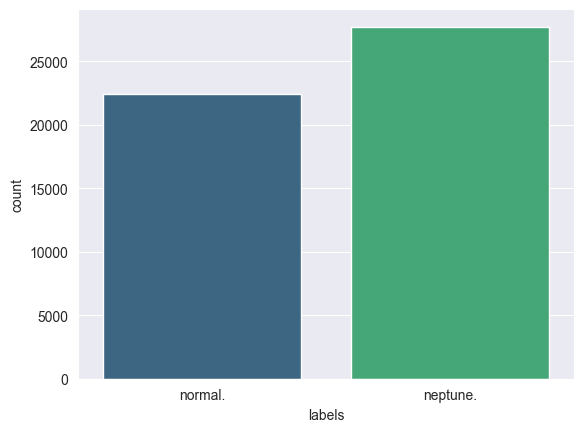

In [13]:
# codigo-alumno
sns.countplot(data = df, x ='labels', palette='viridis')
plt.show()

En la siguiente celda, exploraremos transformaciones sobre las variables numéricas. Para ello, se pide mostrar 3 histogramas por cada feature numérica:
* Uno con el valor de la variable 
* Uno con el valor de la variable transformada por Box-Cox (si es viable)
* Uno con el valor de la variable transformada por Yeo-Johnson

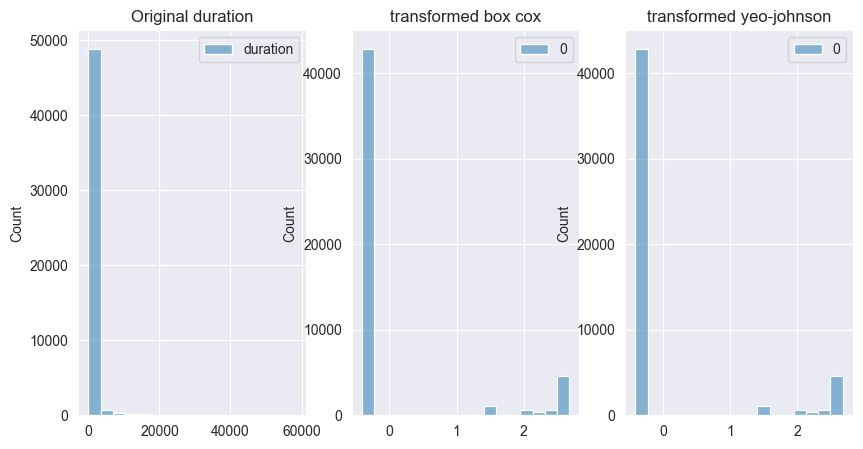

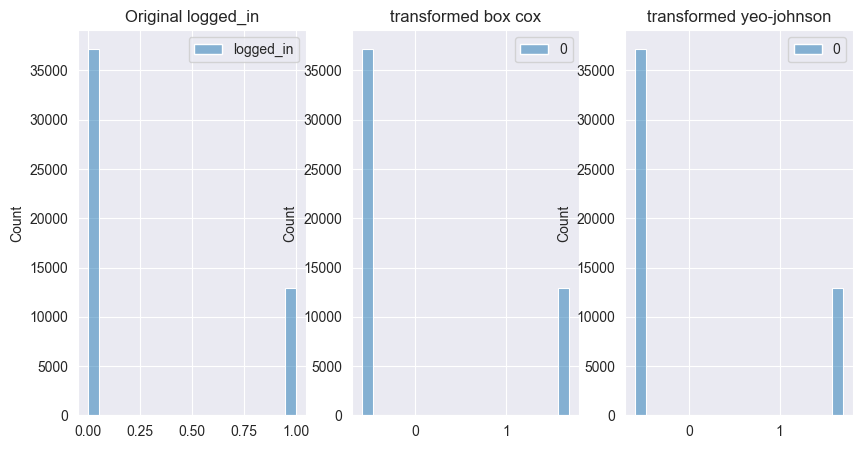

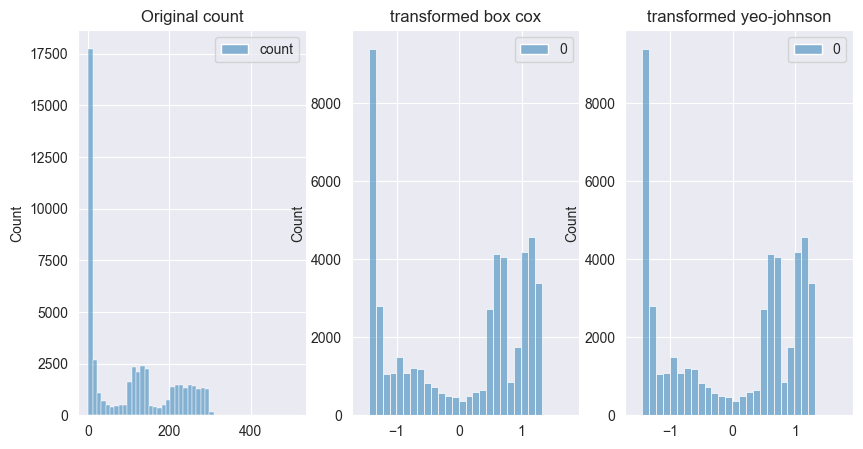

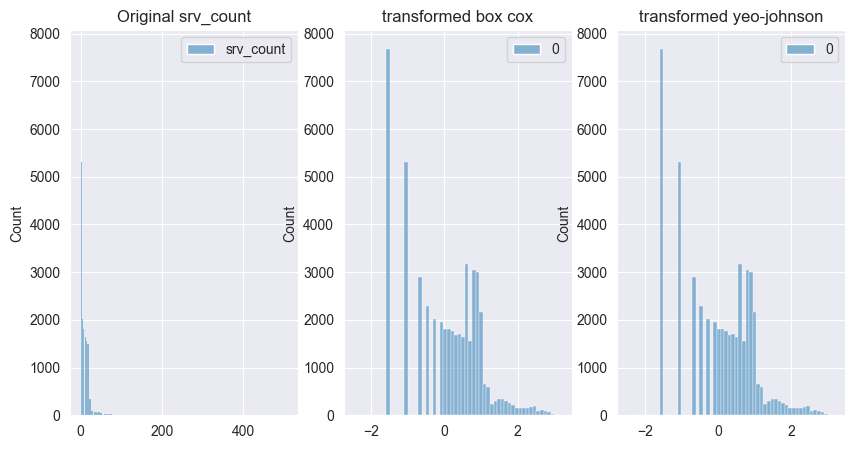

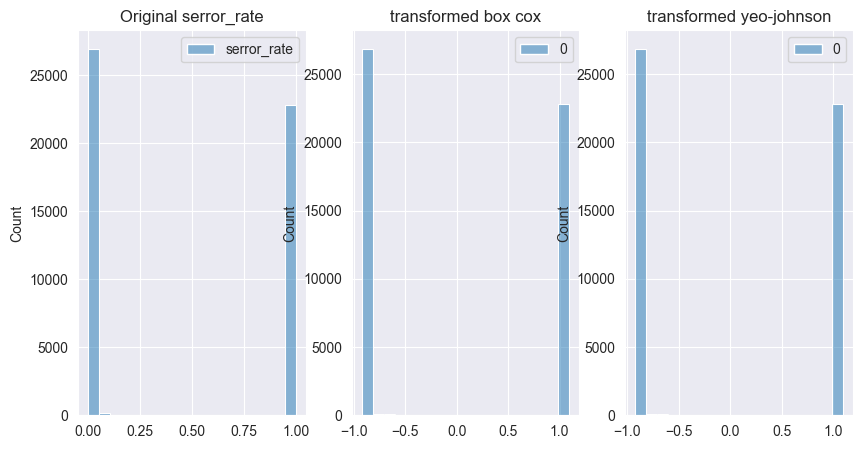

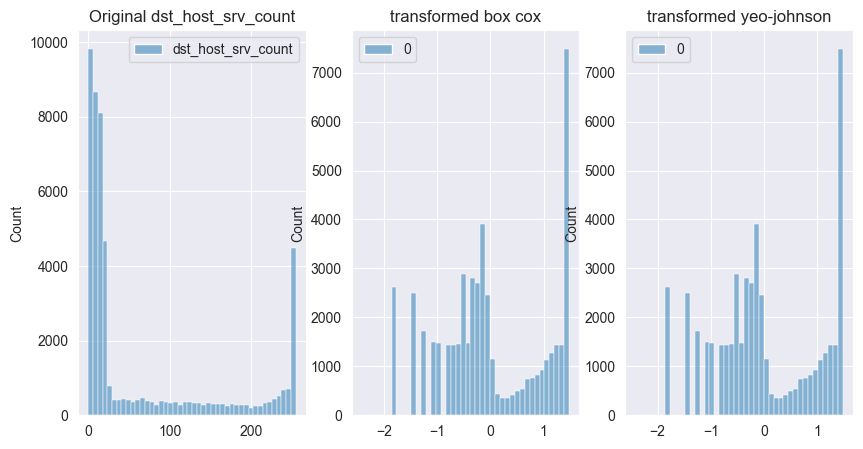

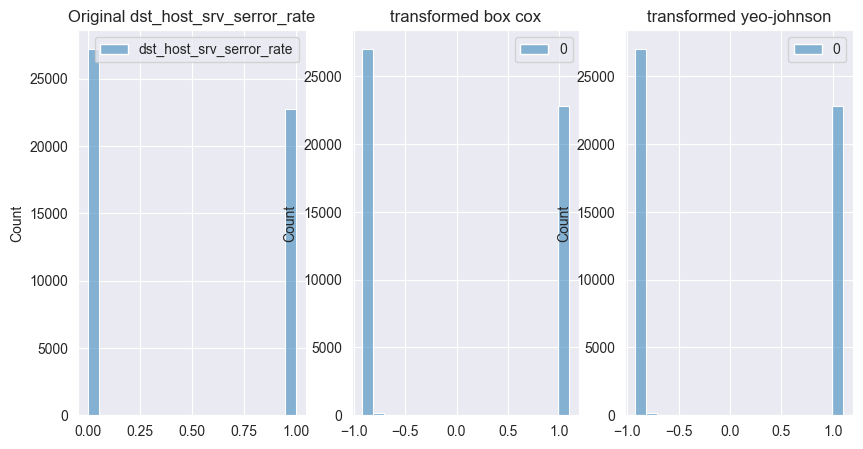

In [14]:

# # codigo-alumno

# Separa las variables numericas
n_cols = ['duration','logged_in', 'count', 'srv_count', 'serror_rate', 
          'dst_host_srv_count','dst_host_srv_serror_rate']

pt = PowerTransformer(method='box-cox')
pt2 = PowerTransformer(method="yeo-johnson")

# Box Cox
for col in n_cols:
    X = df[[col]]
    Xtrans = pt.fit_transform(X + 1)
    Xtrans2 = pt2.fit_transform(X)
    
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    plt.title("Original " + col)
    sns.histplot(X)
    plt.subplot(1,3,2)
    plt.title('transformed box cox')
    sns.histplot(Xtrans)
    plt.subplot(1,3,3)
    plt.title('transformed yeo-johnson')
    sns.histplot(Xtrans2)
    plt.show()
    
    




Por la forma de los histogramas, podría ser un buen estudio convertir las variables numéricas a variables dummy, y es lo que hareis en este apartado. En concreto, en la siguiente celda, realizad una binarización de estas features tomando el criterio que considereis más apropiado.

_Nota_: No siempre la media o la mediana es la mejor de los umbrales.

In [15]:
# codigo-alumno

# Binarizer

cols = df[['duration','logged_in', 'count', 'srv_count', 'serror_rate', 
          'dst_host_srv_count','dst_host_srv_serror_rate']]

for i in cols:
    df[i] = Binarizer(threshold=np.median(df[i])).fit_transform(df[[i]])

    

In [16]:
""" No alterar """

try:
    assert df.shape == (50177, 11)
    assert 0 < df['duration'].sum() < 50177
    assert 0 < df['count'].sum() < 50177
    assert 0 < df['srv_count'].sum() < 50177
    assert 0 < df['serror_rate'].sum() < 50177
    assert 0 < df['dst_host_srv_count'].sum() < 50177
    assert 0 < df['dst_host_srv_serror_rate'].sum() < 50177
    assert 0 < df['logged_in'].sum() < 50177
except:
    print('Algo falla')

Para finalizar con estas features, en la siguiente celda, se pide mostrar un baplot (no histograma) por cada una de estas variables binarias estratificado por la variable objetivo (labels)

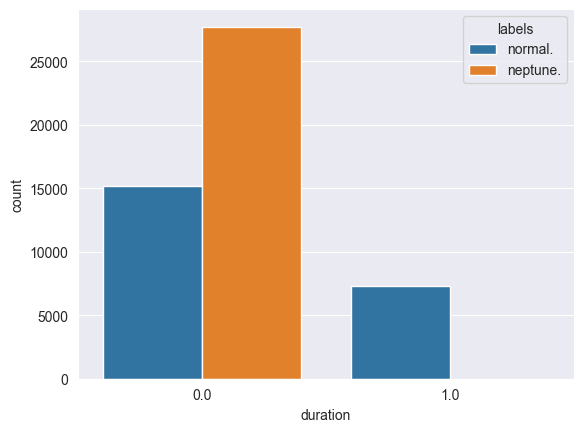

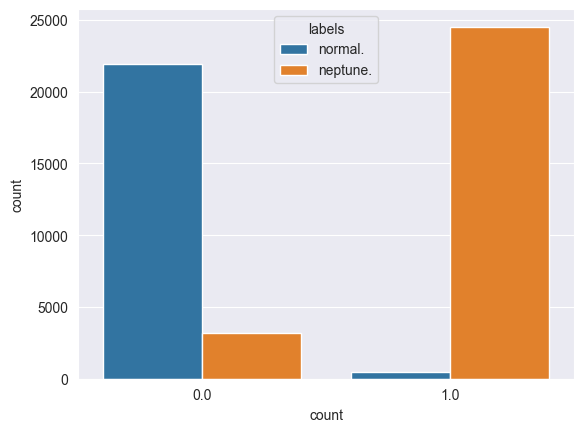

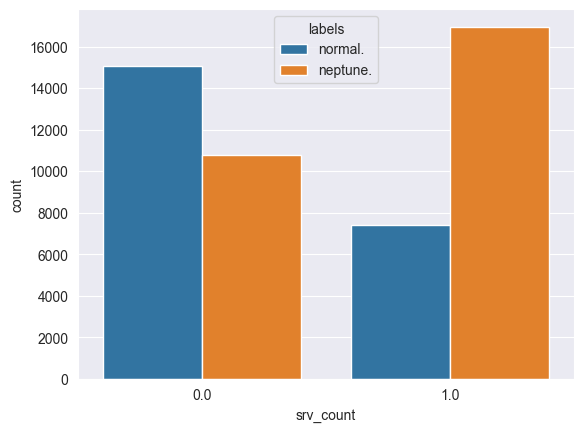

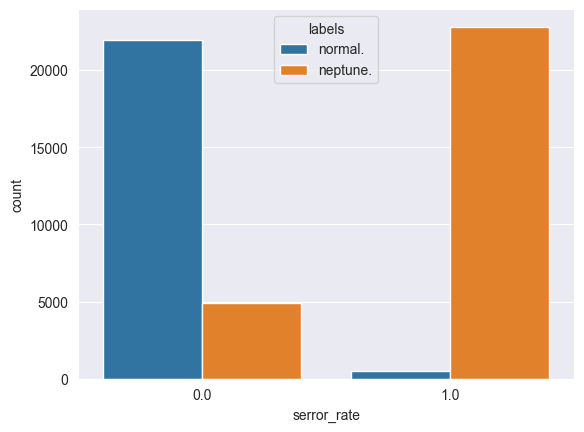

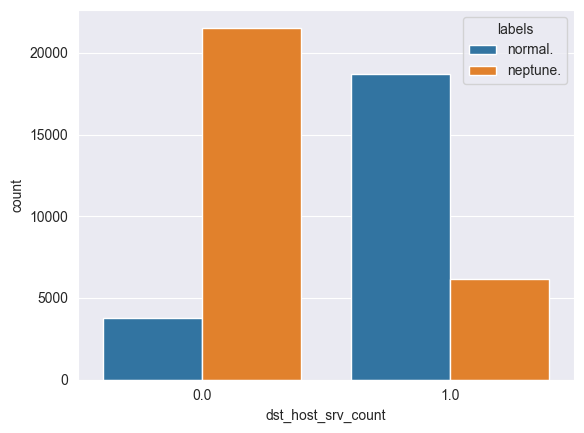

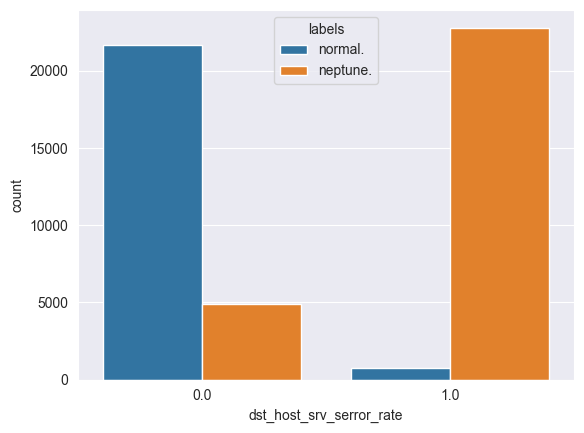

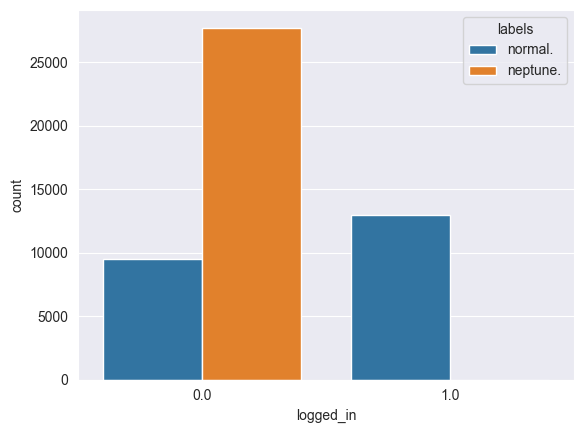

In [17]:
# codigo-alumno

var_bin = df[['duration', 'count', 'srv_count', 'serror_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate', 
             'logged_in']]

for col in var_bin:
    sns.countplot(data = df, x=col, hue=df.labels)
    plt.show()


En la siguiente celda, exploraremos las variables categóricas. Para ello, se pide mostrar un barplot por cada feature categórica:

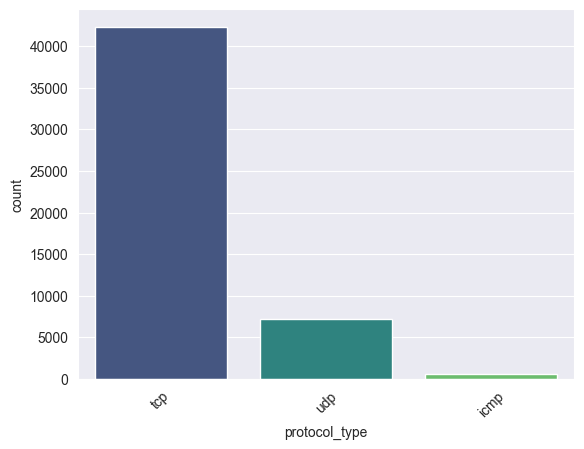

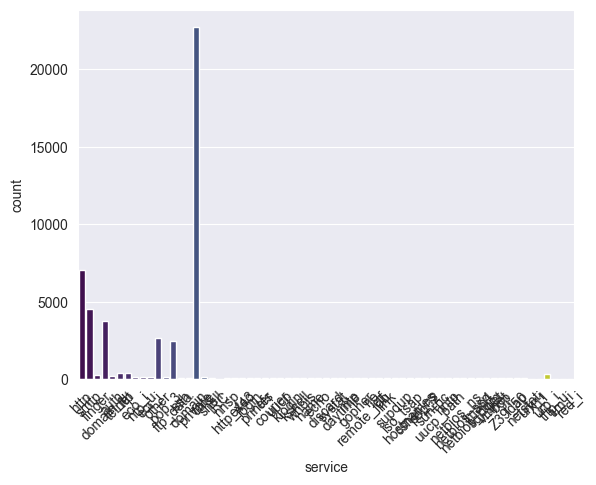

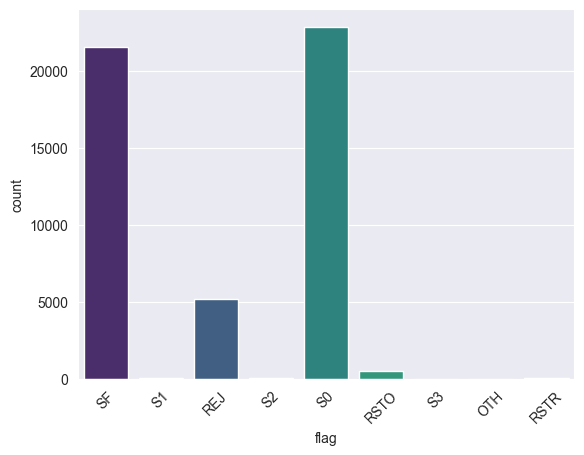

In [18]:
# codigo-alumno

cat_cols = ['protocol_type', 'service','flag']


for col in cat_cols:
    sns.countplot(data = df, x = col, palette='viridis')
    plt.xticks(rotation=45)
    plt.show()


Para lo que resta de ejercicio, localizaremos las 2 categorías más frecuentes de las features _flag_ y _service_. En la siguiente celda, se pide transformar estas features para que ponga _resto_ a todos aquellos registros de estas features que no están entre las frecuentes, dejando así 3 catgorías en total.

In [19]:
# codigo-alumno

df['flag'] = df.flag.apply(lambda x: x if x in ['S0', 'SF'] else 'resto')
df['service'] = df.service.apply(lambda x: x if x in ['private', 'http'] else 'resto')

print(f"Categorica flag: \n {df.flag.value_counts()}")
print(f"Categorica service: \n {df.service.value_counts()}")

Categorica flag: 
 S0       22846
SF       21553
resto     5778
Name: flag, dtype: int64
Categorica service: 
 private    22715
resto      20395
http        7067
Name: service, dtype: int64


In [20]:
# Comprobacion iym
df.head()

,duration,protocol_type,service,flag,logged_in,count,srv_count,serror_rate,dst_host_srv_count,dst_host_srv_serror_rate,labels
0,0.0,tcp,http,SF,1.0,0.0,0.0,0.0,0.0,0.0,normal.
1,0.0,tcp,http,SF,1.0,0.0,0.0,0.0,1.0,0.0,normal.
2,0.0,tcp,http,SF,1.0,0.0,0.0,0.0,1.0,0.0,normal.
3,0.0,tcp,http,SF,1.0,0.0,0.0,0.0,1.0,0.0,normal.
4,0.0,tcp,http,SF,1.0,0.0,0.0,0.0,1.0,0.0,normal.


In [21]:
""" No alterar """

try:
    assert df.shape == (50177, 11)
    assert len(df[df['service'] == 'resto']) == 20395
    assert len(df[df['flag'] == 'resto']) == 5778
except:
    print('Algo falla')

Para finalizar con estas features, en la siguiente celda, se pide mostrar un baplot (no histograma) por cada una de estas features categóricas estratificado por la variable objetivo (labels)

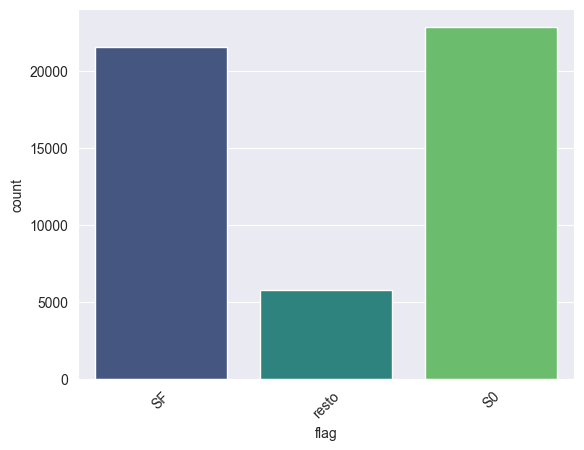

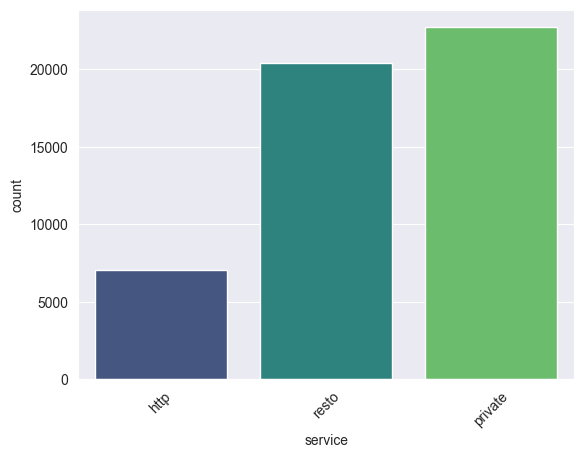

In [22]:
# codigo-alumno
for col in df[['flag', 'service']]:
    sns.countplot(data = df, x = col, palette='viridis')
    plt.xticks(rotation=45)
    plt.show()

Antes de empezar con la modelización, eliminad los duplicados en la siguiente celda:

In [23]:
# codigo-alumno

df.duplicated().sum()
df = df[~df.duplicated()].copy()



In [24]:
df.shape

(163, 11)

In [25]:
""" No alterar """

try:
    assert 100 < df.shape[0] < 1000
    assert df.shape[1] == 11
except:
    print('Algo falla')

# Fase de modelos

## Model 1

Realizad un ajuste de machine learning con las siguientes características:
* probad 5 algoritmos en bucle y mostrar un boxplot con los resultados
* usad la técnica de validación cruzada KFolds (5 folds) 
* entrenad solo con variables numericas 

 Logistic regression : 0.8708333333333332, 0.02472733539430561
 Decision Tree : 0.8645833333333333, 0.03838674563684311
 KNeighbors classifier : 0.8217803030303031, 0.03698956247192032
 Gaussian NB : 0.7240530303030303, 0.0847495026003157
 Random forest classifier : 0.8893939393939394, 0.01614187557019886


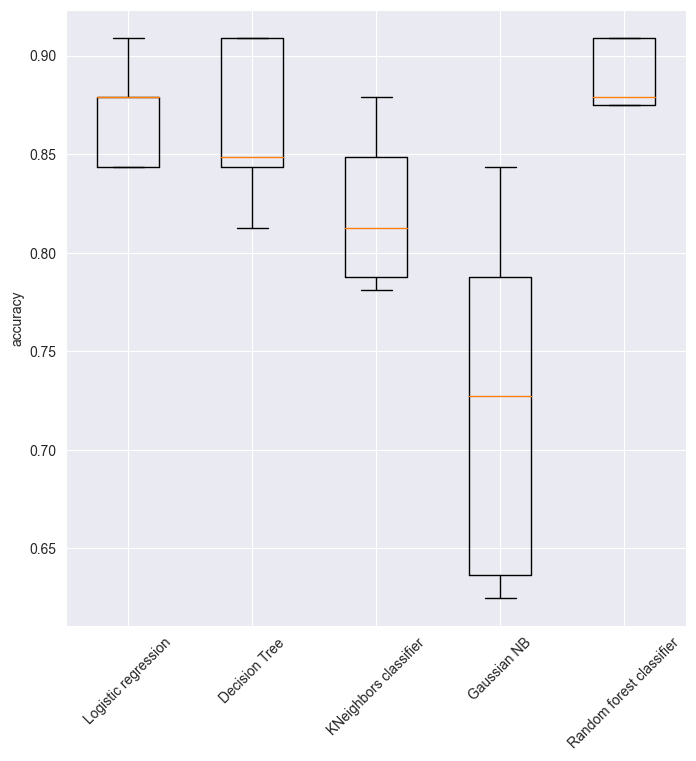

In [26]:
# codigo-alumno

# Separar la variable objetivo del resto del data set, axis 1 
X = df[['duration','logged_in', 'count', 'srv_count', 'serror_rate', 
          'dst_host_srv_count','dst_host_srv_serror_rate']]

# Variable objetivo a estudiar
y = df.labels

# Algoritmos a estudiar
algoritmos = []
algoritmos.append(('Logistic regression', LogisticRegression(random_state=seed)) )
algoritmos.append(('Decision Tree', DecisionTreeClassifier(random_state=seed)) )
algoritmos.append(('KNeighbors classifier', KNeighborsClassifier()) )
algoritmos.append(('Gaussian NB', GaussianNB()) )
algoritmos.append(('Random forest classifier', RandomForestClassifier(random_state=seed)) )


names = []
cv_res = []
scoring = 'accuracy'
for name, alg in algoritmos:

    kfold = KFold(n_splits=5, shuffle= True, random_state=seed)
    results = cross_val_score(alg, X,y, cv=kfold, scoring=scoring)

    cv_res.append(results)
    names.append(name)
    print(f" {name} : {str(results.mean())}, {str(results.std())}")

plt.figure(figsize=(8,8))
plt.ylabel(scoring)
plt.boxplot(cv_res)
plt.xticks(range(1, len(names) + 1), names, rotation = '45')
plt.show()





## Model 2

Realizad un ajuste de machine learning con las siguientes características:
* probad 5 algoritmos en bucle
* usad la técnica de validación KFolds (5 folds) 
* usad un pipeline que encadene 
    * One-hot-encoder con las variables tipo string
    * algortimo 
* entrenad con todas las variables
* mostrad la matriz de confusión en cada caso

Logistic regression : 0.9015151515151516, 0.03133310803799199
Matriz de confusion: 
[[ 32   9]
 [  7 115]]
***
Decision Tree : 0.9015151515151516, 0.03133310803799199
Matriz de confusion: 
[[ 32   9]
 [  7 115]]
***
KNeighbors classifier : 0.8954545454545453, 0.025875676219853858
Matriz de confusion: 
[[ 30  11]
 [  6 116]]
***
Gaussian NB : 0.7303030303030302, 0.060719590634890554
Matriz de confusion: 
[[41  0]
 [44 78]]
***
Random forest classifier : 0.9015151515151516, 0.03133310803799199
Matriz de confusion: 
[[ 32   9]
 [  7 115]]
***


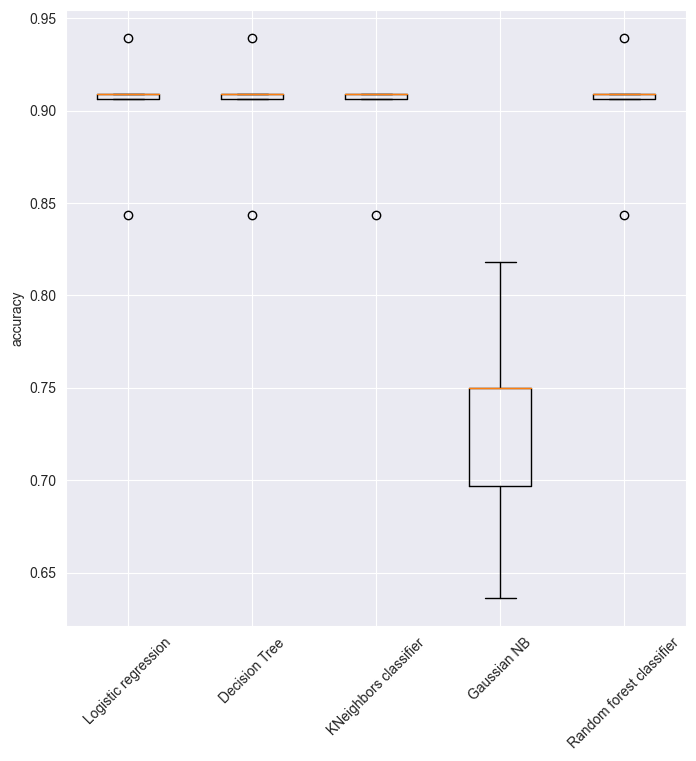

In [27]:
# codigo-alumno

# Separar la variable objetivo del resto del data set, axis 1 
X_m2 = df.drop('labels', axis = 1)

# Variable a estudiar
y_m2 = df.labels


# Categorias/ variables tipo string
protocol = [['tcp', 'udp', 'icmp']]
service = [['resto', 'http', 'private']]
flag = [['SF', 'resto', 'S0']]

names2 = []
cv_res2 = []
scoring = 'accuracy'

# Transformadores
ctransformer2 = ColumnTransformer([
    # siempre son tres y para quitarse los null
    ('encoder1', OneHotEncoder(categories=protocol, handle_unknown='ignore'), ['protocol_type']),
    ('encoder2', OneHotEncoder(categories=service, handle_unknown='ignore'), ['service']),
    ('encoder3', OneHotEncoder(categories=flag, handle_unknown='ignore'), ['flag'])
])

# Procesamiento
for name, alg in algoritmos:
    pipeline = make_pipeline(ctransformer2, alg)
    kfold = KFold(n_splits=5, shuffle= True, random_state=seed)
    results = cross_val_score(pipeline, X_m2,y_m2, cv=kfold, scoring=scoring)
    
    cv_res2.append(results)
    names2.append(name)
    print(f"{name} : {str(results.mean())}, {str(results.std())}")
    
    y_pred = cross_val_predict(pipeline, X_m2, y_m2, cv=kfold)
    print("Matriz de confusion: ")
    print(confusion_matrix(y_m2, y_pred))
    print('***')

plt.figure(figsize=(8,8))
plt.ylabel(scoring)
plt.boxplot(cv_res2)
plt.xticks(range(1, len(names2) + 1), names2, rotation = '45')
plt.show()




## Model 3

Realizad un ajuste de machine learning en bucle con las siguientes características:
* probad 3 PCA dentro del pipeline y en bucle para n_components=3,4,5 
* probad 5 algoritmos en bucle
* usad la técnica de validación StratifiedKFolds (5 folds) 
* usad un pipeline que encadene 
     * One-hot-encoder con las variables tipo string, especificando eliminar la primera columna si es binaria
     * PCA
     * algortimo 
* mostrad la matriz de confusión en cada caso

In [28]:
# codigo-alumno

names3 = []
cv_res3 = []
scoring = 'accuracy'

# Categorias variables tipo string
protocol = [['tcp', 'udp', 'icmp']]
service = [['resto', 'http', 'private']]
flag = [['SF', 'resto', 'S0']]

# Transformadores
ctransformer3 = ColumnTransformer([
    ('encoder1', OneHotEncoder(drop='if_binary', categories = protocol), ['protocol_type']),
    ('encoder2', OneHotEncoder(drop = 'if_binary', categories = service), ['service']),
    ('encoder3', OneHotEncoder(drop = 'if_binary', categories = flag), ['flag'])
])

# Separar la variable objetivo del resto del data set, axis 1 
X_m3 = df.drop('labels', axis = 1)

# Variable a estudiar
y_m3 = df.labels


for i in range(3,6):
    pca = PCA(i)

    for name, alg in algoritmos:
        pca = PCA(i)
        pipeline = make_pipeline(ctransformer3, pca, alg)
        Skfold = StratifiedKFold(n_splits=5, shuffle= True, random_state=seed)
        results = cross_val_score(pipeline, X_m3,y_m3, cv=Skfold, scoring=scoring)
    
        cv_res3.append(results)
        names3.append(name)
        print(f"{name} : {str(results.mean())}, {str(results.std())}")

        y_pred1 = cross_val_predict(pipeline, X_m3, y_m3, cv=kfold)
        print("Matriz de confusion")
        print(confusion_matrix(y_m3, y_pred1))
        print('***')



Logistic regression : 0.847159090909091, 0.06083526733783713
Matriz de confusion
[[ 28  13]
 [  7 115]]
***
Decision Tree : 0.877840909090909, 0.05721452670533682
Matriz de confusion
[[ 32   9]
 [  7 115]]
***
KNeighbors classifier : 0.8342803030303031, 0.04995837339769598
Matriz de confusion
[[ 30  11]
 [  7 115]]
***
Gaussian NB : 0.8589015151515152, 0.053273253005300496
Matriz de confusion
[[ 28  13]
 [  7 115]]
***
Random forest classifier : 0.877840909090909, 0.05721452670533682
Matriz de confusion
[[ 32   9]
 [  7 115]]
***
Logistic regression : 0.877840909090909, 0.05721452670533682
Matriz de confusion
[[ 32   9]
 [  7 115]]
***
Decision Tree : 0.877840909090909, 0.05721452670533682
Matriz de confusion
[[ 32   9]
 [  7 115]]
***
KNeighbors classifier : 0.8342803030303031, 0.04995837339769598
Matriz de confusion
[[ 31  10]
 [ 16 106]]
***
Gaussian NB : 0.8833333333333334, 0.045039933561711015
Matriz de confusion
[[ 32   9]
 [  9 113]]
***
Random forest classifier : 0.877840909090

## Model 4

Con el estudio previo que hemos realizado de validación cruzada, ya sabremos qué algoritmos son más robustos. En esta parte, vamos a separar primero el dataset en _train_ y _test_. En concreto, separaremos el 20% del dataset en el _test-set_ con el que validaremos la calidad real del algortimo. Tras ello, solo con el _train test_, se pide realizar un ajuste de machine learning con las siguientes características:
* usad el mejor algoritmo a vuestro juicio (pero se pide justificarlo en un comentario del código)
* usad un pipeline que encadene 
    * One-hot-encoder con las variables tipo string, especificando eliminar la primera columna si es binaria
    * algortimo 
* Realizad la predicción de _train_ y _test_ para poder mostrar ambas matrices de confusión (justificar si existe overfitting).

In [29]:
# codigo-alumno
""" iym: No existiria overfitting, si se observa la matriz de confusion para train y test se observa que los \
falsos positivos y negativos se distribuyen en proporciones muy similares """

# Separar la variable objetivo del resto del data set, axis 1 
X_m4 = df.drop('labels', axis = 1)

# Variable a estudiar
y_m4 = df.labels

# Separar el dataset en train-test
X4_Train, X4_test, y4_train, y4_test = train_test_split(X_m4, y_m4, test_size=0.2, random_state=seed)

# Transformadores
ctransformer4 = ColumnTransformer([
    ('encoder1', OneHotEncoder(drop='if_binary', categories = protocol), ['protocol_type']),
    ('encoder2', OneHotEncoder(drop = 'if_binary', categories = service), ['service']),
    ('encoder3', OneHotEncoder(drop = 'if_binary', categories = flag), ['flag'])
])

""" iym: Se utilizara el algoritmo Random Forest Classifier al existir una menor variabilidad en sus puntuaciones (scores)
al hacer la validacion cruzada"""

modelo = RandomForestClassifier(random_state=seed)
pipeline = make_pipeline(ctransformer4, modelo)
pipeline.fit(X4_Train, y4_train)
score = pipeline.score(X4_test, y4_test)

print(f" Random forest classifier, score: {score}.")

# Estandarizacion - prediccion

print("Confusion matrix test data")
y_pred2 = pipeline.predict(X4_test)
matrix = confusion_matrix(y4_test, y_pred2)
print(matrix)
print("****")
tn, fp, fn, tp = confusion_matrix(y4_test, y_pred2).ravel()
print(tn,fp, fn, tp)
print("****")

# Confusion matrix train data
print("Confusion matrix train data")
y_pred3 = pipeline.predict(X4_Train)
matrix2 = confusion_matrix(y4_train, y_pred3)
print(matrix2)
print("****")
tn, fp, fn,tp = confusion_matrix(y4_train, y_pred3).ravel()
print(tn, fp, fn, tp)

 Random forest classifier, score: 0.9090909090909091.
Confusion matrix test data
[[ 5  2]
 [ 1 25]]
****
5 2 1 25
****
Confusion matrix train data
[[27  7]
 [ 6 90]]
****
27 7 6 90


## Model 5

Con el estudio previo que hemos realizado de validación cruzada, ya sabremos qué algoritmos son más robustos. En esta parte, vamos a separar primero el dataset en train y test. En concreto, separaremos el 20% del dataset en el test-set con el que validaremos la calidad real del algortimo. Tras ello, solo con el train test, se pide realizar un ajuste de machine learning con las siguientes características:
* usad el mismo algoritmo que en el apartado anterior
* usad la técnica de validación cruzada KFolds (5 folds) 
* usad un pipeline que encadene:
     * One-hot-encoder si son tipo variables tipo string, especificando eliminar la primera columna si es binaria
     * StandardScaler
     * algortimo 
* realizar un tuneado del modelo con grid-search
    
Con el mejor de los modelos tuneados, realizad la predicción de _train_ y _test_ para poder mostrar ambas matrices de confusión (justificar si existe overfitting).

In [30]:
# codigo-alumno

""" iym: No existiria overfitting, si se observa la matriz de confusion para train y test se observa que los \
falsos positivos y negativos se distribuyen en proporciones muy similares """

# Separar la variable objetivo del resto del data set, axis 1 
X_m5 = df.drop('labels', axis = 1)

# Variable a estudiar
y_m5 = df.labels

# Separar el dataset en train-test
X5_train, X5_test, y5_train, y5_test = train_test_split(X_m5, y_m5, test_size=0.2, random_state=seed)


# Transformadores
ctransformer5 = ColumnTransformer([
    ('encoder1', OneHotEncoder(drop='if_binary', categories = protocol), ['protocol_type']),
    ('encoder2', OneHotEncoder(drop = 'if_binary', categories = service), ['service']),
    ('encoder3', OneHotEncoder(drop = 'if_binary', categories = flag), ['flag'])
])

# Estandarizar
scaler = StandardScaler()

# Algoritmo
modelo = RandomForestClassifier(random_state=seed)

# Pipeline
pipeline = Pipeline([('Transformacion columna', ctransformer5),
                    ('Standard scaler', scaler),
                    ('Modelo', modelo)])

# Tuneado con grid search
param_grid = {
    'Modelo__n_estimators': [10,20],
    'Modelo__max_features': ['auto', 'sqrt', 'log2'],
    'Modelo__max_depth': [4,5,6,7,8],
    'Modelo__criterion': ['gini','entropy']
}

# Validacion cruzada
cvt = KFold(n_splits = 5, shuffle=True, random_state=seed)

# Evaluacion modelo
grid_model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv = cvt)
grid_model.fit(X5_train, y5_train)

# Mejor score
print(f"Random forest classifier, {grid_model.best_score_}")

# Best parameters
print("****")
print("Mejores parametros")
print("****")
print(grid_model.best_estimator_)

# Matriz de confusion para test

print("Matriz de confusion - test")
y_pred4 = grid_model.best_estimator_.predict(X5_test)
matrix = confusion_matrix(y5_test, y_pred4)
print(matrix)
print("****")
tn, fp, fn, tp = confusion_matrix(y5_test, y_pred4).ravel()
print("****")
print("\n")

# Matriz de confusion para train
print("Matriz de confusion - train")
y_pred5 = grid_model.best_estimator_.predict(X5_train)
matrix = confusion_matrix(y5_train, y_pred5)
print(matrix)
print("****")
tn, fp, fn, tp = confusion_matrix(y5_train, y_pred5).ravel()
print("****")
print(tn, fp, fn, tp)

Random forest classifier, 0.8846153846153847
****
Mejores parametros
****
Pipeline(steps=[('Transformacion columna',
                 ColumnTransformer(transformers=[('encoder1',
                                                  OneHotEncoder(categories=[['tcp',
                                                                             'udp',
                                                                             'icmp']],
                                                                drop='if_binary'),
                                                  ['protocol_type']),
                                                 ('encoder2',
                                                  OneHotEncoder(categories=[['resto',
                                                                             'http',
                                                                             'private']],
                                                                drop='if_binary'),
       